<h1><center>A BRIEF HISTORY ABOUT QUANTUM REALITY</center></h1>

## The famous (and controversial) EPR paradox

In 1935, Albert Einstein, Boris Podolsky and Nathan Rosen (EPR) wrote an article entitled "Can Quantum Mechanical Description of Physical Reality Be Considered Complete?"[1], in which they set criterials for identifying whether a physical theory was complete or not, according to the reality of its elements. A sufficient condition for the reality of a physical quantity is the ability of predicting it with certainty without disturbing the system. However, in the case where we have two physical quantities described by non-commuting operators, the knowledge of one precludes the knowledge of the other. According to EPR, this leads to two conclusions: either (1) the wave function does not fully describe the reality of the system, or (2) these two quantities do not have a simultaneous reality.

It is important to note that EPR rejected the idea that the measurement of a particle in a entangled pair could affect the state of another particle distant from the first one. They concluded that the particle in question must be described by a complete quantum formalism, thus there will be a reasonable description (a "local reality") of the world. In order to achieve this, they argued that quantum mechanics should be supplemented by additional variables. These additional, or *hidden*, variables were to restore the causality and locality.

## Bohr's principle of complementarity and Einstein locality

On the other hand, Niels Bohr disagreed with EPR’s interpretation of the notion of locality. He conceded that *“there is no question of a mechanical disturbance of the system under investigation”* (due to the measurement of the other, distant system), but he added: *“there is essentially the question of an influence on the very conditions which define the possible types of predictions regarding the future behavior of the system”* [2]. Bohr gave to his point of view the name **complementarity principle**. Its meaning is that some types of predictions are possible while others are not, because they are related to mutually incompatible tests. According to Bohr, each experimental setup must be considered separately.

Even with these arguments, Einstein was not convinced. For him, what actually happens with one system spatially separated from another, is something independent of what is done with the second one. This physical principle has received the name **Einstein locality**.

## Bell's inequalities

In 1964, John Bell showed in an article [3] that if measurements are chosen correctly for a given entangled state, statistics cannot be explained by any theory of local hidden variables, and that there must be correlations that go beyond the classical domain.

For better understanding of the idea of entanglement, suppose that there are two systems (Alice and Bob) and in each of them two measurements are made: $A$, $A'$, $B$ and $B'$, which generate an output 1 or -1.

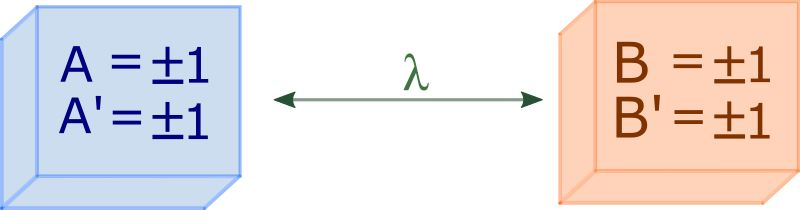


Suppose now that a statistical correlations between $A(a)$ and $B(b)$ is due to information carried by and localized within each particle, and that at some time in the past the particles constituting one pair were in contact and communication regarding this information. 

The information, which is not quantum mechanical, is part of the content of a set of hidden variables, denoted collectively by $\lambda$. The results of the two selections are then to be deterministic functions $A(a,\lambda)$ and $B(b,\lambda)$. Since the two selections may occur at an arbitrarily great distance from each other, the **locality** assumption requires $A(a,\lambda)$ to be independent of the parameter $b$ and $B(b,\lambda)$ to be likewise independent of $a$. *No information can travel faster than the speed of light.* The hidden variable $\lambda$ that defines all correlations is such that

\begin{equation}
    \langle AB \rangle = \sum_{\lambda} P(\lambda) A(\lambda) B(\lambda).
\end{equation}

Then, let us define the operator

\begin{equation}
S = \sum_{\lambda} P(\lambda)[A(\lambda)(B(\lambda)-B'(\lambda))+ A'(\lambda)(B(\lambda)-B'(\lambda))].
\end{equation}

The **realism** assumption requires that all observables have a definite value regardless of the measurement (+1 or -1). This implies that either $\vert B(\lambda) + B'(\lambda) \vert =$ 0 (or 0) while $\vert B(\lambda) + B'(\lambda) \vert \neq$ 0 (or 2), respectively. That is, $\vert S \vert = 2$, and noise will only decrease this value.

## CHSH Inequality

In 1969, John Clauser, Michael Horne, Abner Shimony and Richard Holt derived the CHSH Inequality [4], $\vert S \vert \leqslant$ 2, such as

\begin{equation}
S = \langle AB \rangle - \langle AB' \rangle + \langle A'B \rangle + \langle A'B' \rangle 
\end{equation}

and the correlated expectation is given by 

\begin{equation}
\langle AB \rangle = P(1,1) + P (0,0) - P(0,1) - P(1,0)
\end{equation}

with 0 generating an output +1 and 1 generating an output -1. The correlation of 1 means that both observables have even parity, and the correlation of -1 means that both have odd parity.

However, in fact $\vert S \vert >$ 2. How is this possible? The previous assumptions must not be valid, and this is one of the most counterintuitive ideas to be accepted in the quantum world. 




The first step is to call our module called bell_checker (with all the others ones that are necessary)

In [1]:
#!/usr/bin/env python3

from qiskit import*

import numpy as np
from tqdm import tqdm

import bell_checker
import bell_checker.graphs_tools as GraphsTools
from bell_checker.circuit_maker import CircuitMaker

Now define the set of matrices to generate the 2D basis for each qubit

In [2]:
obs = [ [ np.eye(2), np.array([ [1,1], [1,-1] ])/np.sqrt(2)],
       [ np.eye(2), np.array([ [1,1], [1,-1] ])/np.sqrt(2) ]]

Then, we introduce the Bell inequality that we are looking to implement that is, in our case, the CHSH inequality.

Notice that we obtained the inequality in terms of the expectation values before, but for our module, it's necessary to introduce those quantities in terms of probabilities. We do this on purpose in our show because that leads us to make a simpler generalization to other Bell inequalities.

In [3]:
Sabxy = [(1,-1,-1,1), 
         (1,-1,-1,1), 
         (-1,1,1,-1), 
         (1,-1,-1,1)]                 # Set of probabilities for the inequality type CHSH

S = 2                                 # The classical limit for this inequality

Now, we prepare an entangled state to introduce in our circuit later.

c:\Users\fequi\miniconda3\envs\bellcheck\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:163: UserWarning: Style JSON file 'bw.json' not found in any of these locations: c:\Users\fequi\miniconda3\envs\bellcheck\lib\site-packages\qiskit\visualization\circuit\styles\bw.json, bw.json. Will use default style.
  self._style, def_font_ratio = load_style(style)


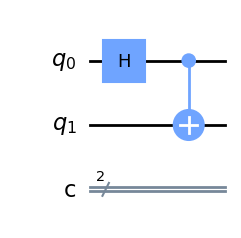

In [4]:
init_state = QuantumCircuit(len(obs), len(obs) )        # We prepare the initial state with the parameters needed for qiskit
init_state.h(0)                                         # Introduce a Hadamard gate to generate a superposition state
init_state.cx(0,1)                                      # Introduce a CNOT gate between qubits 0 and 1
init_state.draw(output='mpl', style="bw")               # We show the basic circuit to create an entangled state

Then, we define the backend

In [5]:
simulator = Aer.get_backend('aer_simulator')

We will check if our initial state with the basis established without rotations breaks the inequality

In [6]:
circuits        = CircuitMaker()

bell_circuits = circuits.constructor( init_state, obs , [0] )
job = simulator.run( bell_circuits, shots=1024 )
results = job.result( )
counts = results.get_counts( )
result = circuits.witness(Sabxy, S, counts)

The inequality has been broken in the circuit number 0 with value 2.0078125!


As we can see, we were not able to break the classical limit, so we will look for the values ​​that break it by calculating a list of possible rotations

This state and observable combination don't violate the bell inequalitie!
The inequality has been broken in the circuit number 0 with value 2.6875!
This state and observable combination don't violate the bell inequalitie!
The inequality has been broken in the circuit number 0 with value -2.0625!
The inequality has been broken in the circuit number 0 with value -2.693359375!
This state and observable combination don't violate the bell inequalitie!
This state and observable combination don't violate the bell inequalitie!


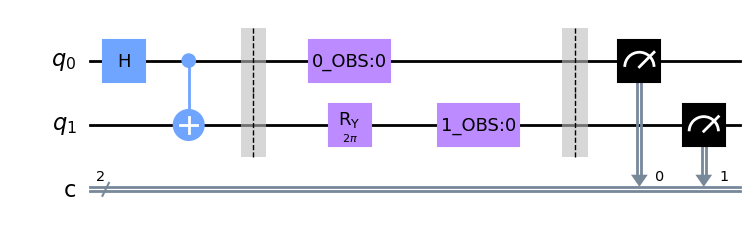

In [7]:
circuits = CircuitMaker()                               # Here we create the CircuitMaker object

t = np.linspace(0,2*np.pi,7)
v = []

for i in t:
    bell_circuits = circuits.constructor( init_state, obs , [i] )
    job = simulator.run( bell_circuits, shots=1024 )
    results = job.result( )
    counts = results.get_counts( )
    result = circuits.witness(Sabxy, S, counts)[0]
    v.append(result)
    
bell_circuits[0].draw(output='mpl', style="bw")

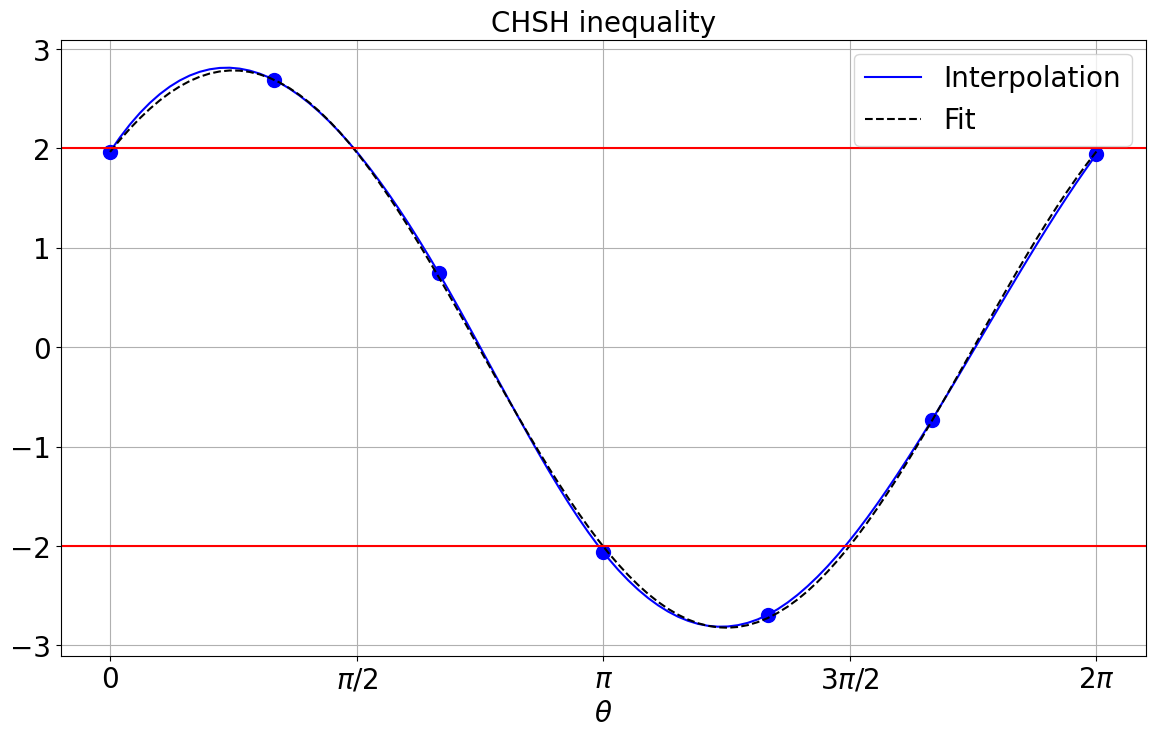

In [8]:
GraphsTools.g1D(S=S,t=t,v=v,title="CHSH inequality")

As we can see, we were able to break the classic limit twice. In addition, by making an adjustment and an interpolation with the data, we find the regions where this is true.

**REFERENCES**

[1] A. Einstein, B. Podolsky, and N. Rosen. “Can Quantum-Mechanical Description of Physical Reality Be Considered Complete?” In: Phys. Rev. 47 (10 May 1935), pp. 777–780. 

[2] Niels Bohr. “Can quantum-mechanical description of physical reality be considered complete?” In: Physical review 48.8 (1935), p. 696.

[3] John S Bell. “On the einstein podolsky rosen paradox”. In: Physics Physique Fizika 1.3 (1964), p. 195.

[4] John F Clauser et al. “Proposed experiment to test local hidden-variable theories”. In: Physical review letters 23.15 (1969), p. 880.

